# Support Vector Machine

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.metrics import classification_report

#for time count we use belwo library
from timeit import default_timer as timer
from datetime import timedelta

yi * (W) power (t) Xi  + bi >= 1


(w*, b*) = ( ||w|| /2 ) + Ci + Sumof Zeta : c=how many errors, Zeta = value of the error


# Get the Data

Set index_col=0 to use the first column as the index.

In [4]:
df = pd.read_csv("creditcard")

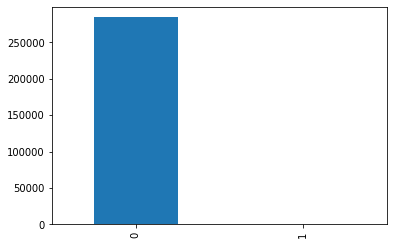

In [5]:
count_Class=pd.value_counts(df["Class"], sort= True)
count_Class.plot(kind= 'bar')

In [6]:
No_of_frauds= len(df[df["Class"]==1])
No_of_normals = len(df[df["Class"]==0])
print("The number of fraudulent transactions( Class 1) are: ", No_of_frauds)
print("The number of normal transactions( Class 0) are: ", No_of_normals)
total= No_of_frauds + No_of_normals
Fraud_percent= (No_of_frauds / total)*100
Normal_percent= (No_of_normals / total)*100
print("Class 0 percentage = ", Normal_percent)
print("Class 1 percentage = ", Fraud_percent)

The number of fraudulent transactions( Class 1) are:  492
The number of normal transactions( Class 0) are:  284315
Class 0 percentage =  99.82725143693798
Class 1 percentage =  0.1727485630620034


In [7]:
df.shape

(284807, 31)

In [8]:
df.size  //

8829017

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Standardize the Variables


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
scaler.fit(df.drop('Class',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
scaled_features = scaler.transform(df.drop('Class',axis=1))

In [14]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Class'],
                                                    test_size=0.30)

# Fitting SVM to the Training set

In [17]:
import time
start = time.time()  

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

end = time.time()
print('Time of Training the Algorithm in second',end - start)  #108.6333  mints

Time of Training the Algorithm in second 6518.425388813019


# Predicting the Test set results


In [18]:
import time
start = time.time()

y_pred = classifier.predict(X_test)

end = time.time()
print(end - start)

4.182732105255127


In [19]:
#accuracy of he model
from sklearn.metrics import accuracy_score
print('Accuracy Score :', accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Accuracy Score : 0.9994733330992591
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.84      0.85       148

    accuracy                           1.00     85443
   macro avg       0.93      0.92      0.92     85443
weighted avg       1.00      1.00      1.00     85443



### Using RBF Kernel

In [20]:
import time
start = time.time()  

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

end = time.time()
print('Time of Training the Algorithm in second',end - start)  #7min

C:\Users\Xubair\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Time of Training the Algorithm in second 403.6673035621643


In [21]:
import time
start = time.time()

y_pred = classifier.predict(X_test)

end = time.time()
print('Time of Training the Algorithm in second',end - start)

Time of Training the Algorithm in second 16.22396230697632


In [22]:
#accuracy of he model
from sklearn.metrics import accuracy_score
print('Accuracy Score :', accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
print('\n\n',classification_report(y_test, y_pred))


Accuracy Score : 0.999403110845827


               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.95      0.69      0.80       148

    accuracy                           1.00     85443
   macro avg       0.98      0.84      0.90     85443
weighted avg       1.00      1.00      1.00     85443



### Using Poly Kernel

In [23]:
import time
start = time.time()  

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

end = time.time()
print('Time of Training the Algorithm in second',end - start)  //5min

C:\Users\Xubair\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Time of Training the Algorithm in second 380.45576190948486


In [24]:
import time
start = time.time()

y_pred = classifier.predict(X_test)

end = time.time()
print('Time of Training the Algorithm in second',end - start)

Time of Training the Algorithm in second 16.10900902748108


In [25]:
#accuracy of he model
from sklearn.metrics import accuracy_score
print('Accuracy Score :', accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
print('\n\n',classification_report(y_test, y_pred))

Accuracy Score : 0.999403110845827


               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.95      0.69      0.80       148

    accuracy                           1.00     85443
   macro avg       0.98      0.84      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [26]:
#Applying 10 fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X_train, y = y_train.ravel(), cv = 10)

mean_accuracy= accuracies.mean()*100

std_accuracy= accuracies.std()*100

print("The mean accuracy in %: ", accuracies.mean())
print("The standard deviation in % ", accuracies.std())
print("The accuracy of our model in % is betweeen {} and {}".format(mean_accuracy-std_accuracy, mean_accuracy+std_accuracy))

C:\Users\Xubair\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Xubair\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Xubair\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Xubair\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureW

The mean accuracy in %:  0.9992927505953544
The standard deviation in %  0.00012778734633313784
The accuracy of our model in % is betweeen 99.91649632490213 and 99.94205379416876
